# Graphs to PDF
-  https://stackoverflow.com/questions/27327513/create-pdf-from-a-list-of-images
- 

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import plotnine
import os

In [11]:
#!pip install pillow
#!pip install fpdf
#!pip install img2pdf
#https://pypi.org/project/img2pdf/

In [5]:
#add libraries
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image  
from fpdf import fpdf


In [4]:
df = data('mtcars')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [107]:
#write a function to save plot to variable and then later calling it
def plot1(x, y):
    fig = plt.figure()
    plt.plot(x, y)
    plt.close()
    return fig

In [109]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
f = plot1(x, y)

In [111]:
#f

In [121]:
df1 = df[['wt','mpg']].sort_values(by='wt')
Gwtmpg = plot1(x=df1.wt, y=df1.mpg)

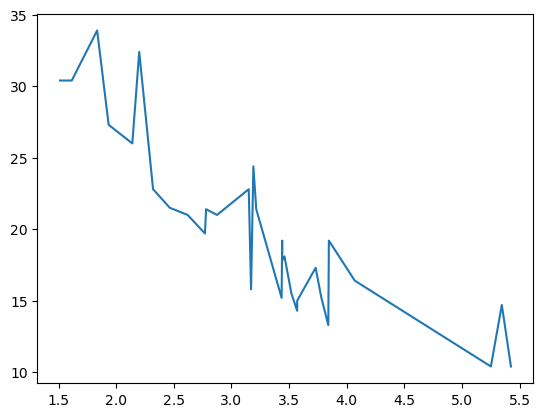

In [122]:
Gwtmpg

## Save plots in a folders
-  https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/

In [19]:
os.listdir('../images/')

['comment.png', 'comment2.png', 'mtplot1.png']

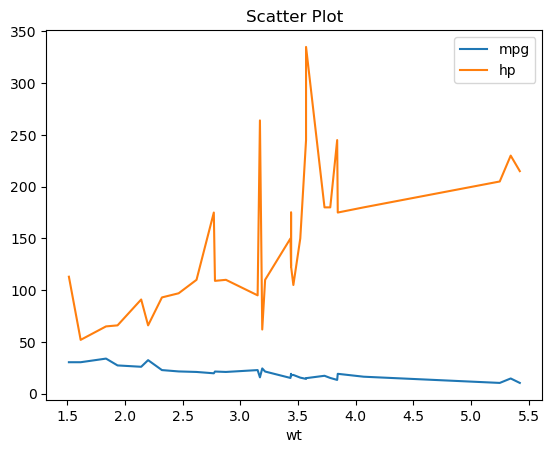

In [18]:
df.sort_values(by='wt').plot(x='wt', y=['mpg','hp'], title='Scatter Plot')
plt.savefig('../images/mtplot1.png')
plt.show();

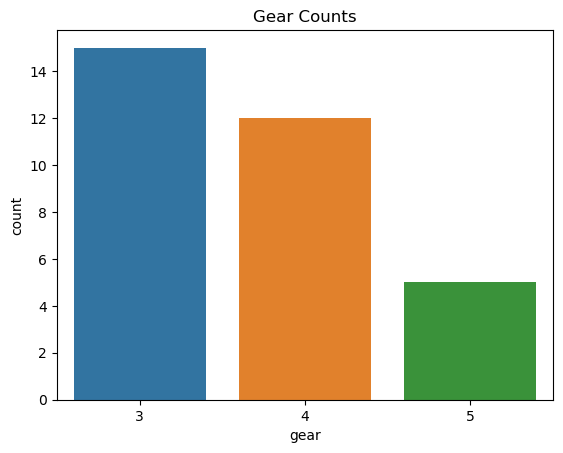

In [22]:
sns.countplot(data=df, x='gear').set_title('Gear Counts')
plt.savefig('../images/mtplot2.png')
plt.show();

In [47]:
mtGC = df.groupby(['gear','cyl'], as_index=False).size().pivot(index='gear', columns='cyl', values='size')
print(mtGC)
#https://blog.quantinsti.com/creating-heatmap-using-python-seaborn

cyl     4    6     8
gear                
3     1.0  2.0  12.0
4     8.0  4.0   NaN
5     2.0  1.0   2.0


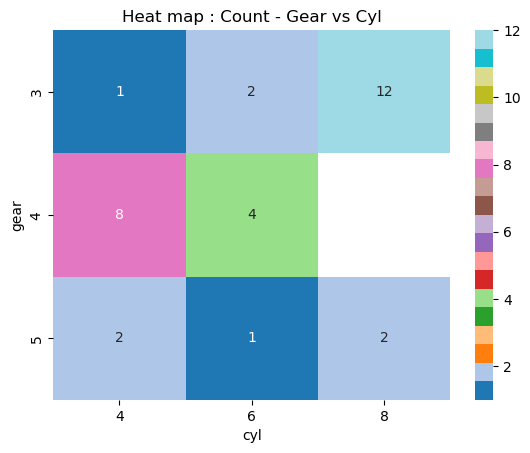

In [80]:
cmap = "tab20"
sns.heatmap(data=mtGC, annot=True, cmap=cmap).set_title('Heat map : Count - Gear vs Cyl')
plt.savefig('../images/mtplot3.png')
plt.savefig("../doc/mtplot3.pdf", format="pdf", bbox_inches="tight")  #save directly from here
plt.show();

In [52]:
os.listdir('../images/')

['comment.png', 'comment2.png', 'mtplot1.png', 'mtplot2.png', 'mtplot3.png']

## one image to pdf
-  https://datatofish.com/images-to-pdf-python/

In [73]:
image1 = Image.open('../images/mtplot1.png')
image1C = image1.convert('RGB')
image1C.save('../doc/mtplot1.pdf')

In [74]:
os.listdir('../doc/')

['foo.pdf',
 'HRA-roadmap.pdf',
 'imagePdf1.pdf',
 'mtcars.html',
 'mtcars.pdf',
 'mtplot1.pdf']

In [ ]:
image = Image.fromarray(image_array)

## Multiple Images
-  folder = '../images/'

In [78]:
image1 = Image.open(r'..\images\mtplot1.png') #re
image2 = Image.open(r'..\images\mtplot2.png')
image3 = Image.open(r'..\images\mtplot3.png')
image1C = image1.convert('RGB')
image2C = image2.convert('RGB')
image3C = image3.convert('RGB')
image_list = [image2C, image3C]  #ignore 1st one

In [79]:
image1C.save(r'..\doc\myPdfImages.pdf', save_all=True, append_images=image_list)

In [77]:
os.listdir('../doc/')

['foo.pdf',
 'HRA-roadmap.pdf',
 'imagePdf1.pdf',
 'mtcars.html',
 'mtcars.pdf',
 'mtplot1.pdf',
 'myPdfImages.pdf']

## another method

In [82]:
# multiple inputs (variant 2)
import img2pdf
with open("../doc/multipleImages.pdf","wb") as f:    f.write(img2pdf.convert(["../images/mtplot1.png", "../images/mtplot2.png"]))

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


In [83]:
#  # convert all files matching a glob
import glob
with open("../doc/multipleImages2.pdf","wb") as f:
    f.write(img2pdf.convert(glob.glob("../images/mt*.png")))

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


## end here
#better code later

In [59]:
imgFolder = '../images/'
os.listdir(imgFolder)

['comment.png', 'comment2.png', 'mtplot1.png', 'mtplot2.png', 'mtplot3.png']

import glob, PIL.Image
#L = [PIL.Image.open(f) for f in glob.glob('../images/*.png')]
#L[0].save('../doc/imgpdfs.pdf', "PDF" ,resolution=100.0, save_all=True, append_images=L[1:])
imageSet = [ Image.open('../images/' + f)   for f in ['mtplot1.png', 'mtplot2.png', 'mtplot3.png']]
imageSet
#convert your PNG from RGBA to RGB
pdf_path = "../doc/imagePdf1.pdf"
#images[0].save(pdf_path, "PDF" ,resolution=100.0, save_all=True, append_images=images[1:])
#RGB error

#function to convert images from folder to pdf
def convert_images_to_pdf(images_folder, pdf_file):
    images = []
    for file in os.listdir(images_folder):
        if file.endswith(".jpg") or file.endswith(".png"):
            image = Image.open(os.path.join(images_folder, file))
            if image.mode == 'RGBA':
                image = image.convert('RGB')
            images.append(image)
    images[0].save(pdf_file, save_all=True, append_images=images[1:])
convert_images_to_pdf(imgFolder, pdf_path)

pdf = FPDF()
#imagelist is the list with all image filenames you can create using os module by iterating all the files in a folder or by specifying their name
for image in imagelist:
    pdf.add_page()
    pdf.image(image,x=0,y=0,w=210,h=297) # for A4 size because some people said that every other page is blank
pdf.output("yourfile.pdf", "F")